# 9.　多値分類
# 9. Multi-value classification

In [1]:
# 必要ライブラリの宣言
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

### データ読み込み
### Load data

In [2]:
# 学習用データ準備
# Preparing learning data
from sklearn.datasets import load_iris
iris = load_iris()
x_org, y_org = iris.data, iris.target

# 入力データに関しては、sepal length(0)とpetal length(2)のみ抽出
# Extract only sepal length(0) and petal length(2) about input data
x_select = x_org[:,[0,2]]
print('元データ', x_select.shape, y_org.shape)

元データ (150, 2) (150,)


In [3]:
# Verify x data
# Sepal_length, Sepal_width, Petal_length, Petal_width (cm)
x_org

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# Verify y data
# 0: Setosa, 1:Versicolour, 2:Virginica / 50 each
y_org

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 学習データの散布図表示
### Show scatter plot of learning data

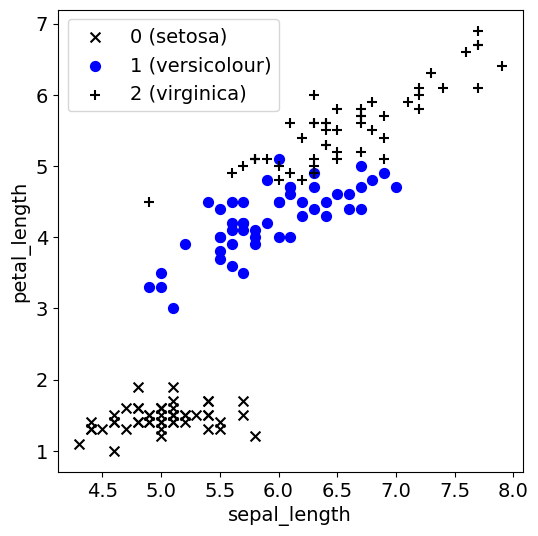

In [5]:
# 散布図の表示
# Show scatter data

# Split test data to class = 0 and class = 1
x_t0 = x_select[y_org == 0]      # Class = 0
x_t1 = x_select[y_org == 1]      # Class = 1
x_t2 = x_select[y_org == 2]      # Class = 2

plt.figure(figsize=(6,6))

# Plot scatter
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')

# Set figure
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('petal_length', fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

### データ前処理
### Data preprocessing

In [6]:
# ダミー変数を追加
# Add dummy variable
x_all = np.insert(x_select, 0, 1.0, axis=1)

In [7]:
# yをOne-hot-Vectorに
# Set y to One-hot-Vector

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,categories='auto')

# Convert 150 dimension vector to matorix (150 x 1)
y_work = np.c_[y_org]

# One hot vectorization
y_all_one = ohe.fit_transform(y_work)

print('オリジナル', y_org.shape)
print('２次元化', y_work.shape)
print('One Hot Vector化後', y_all_one.shape)

オリジナル (150,)
２次元化 (150, 1)
One Hot Vector化後 (150, 3)


In [8]:
# 学習データ、検証データに分割
# Split into training data and validation data
from sklearn.model_selection import train_test_split

# Including one-hot-vector
x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x_all, y_org, y_all_one, train_size=75, test_size=75, random_state=123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape)

(75, 3) (75, 3) (75,) (75,) (75, 3) (75, 3)


In [9]:
print('入力データ(x)')
print(x_train[:5,:])

入力データ(x)
[[1.  6.3 4.7]
 [1.  7.  4.7]
 [1.  5.  1.6]
 [1.  6.4 5.6]
 [1.  6.3 5. ]]


In [10]:
print('正解データ(y)')
print(y_train[:5])

正解データ(y)
[1 1 0 2 2]


In [11]:
print('正解データ (One Hot Vector化後)')
print(y_train_one[:5,:])

正解データ (One Hot Vector化後)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


### 学習用変数の設定
### Setting of learning variable

In [12]:
# 学習対象の選択
# Select learning target
x, yt  = x_train, y_train_one

### 予測関数
### Prediction function

Reference

Innner product of weight matrix and input data
```math
u^{(k)(m)} = W^{(k)} * x^{(m)}    \qquad    (9.7.1)
```

Calculate the predicted value vector using the softmax function from the inner product result
```math
yp^{(k)(m)} = h(u^{(k)(m)})    \qquad    (9.7.2)
```

softmax function
```math
h_i = \frac{\exp(u_i)}{\sum_{j=0}^{N-1}\exp(u_j)}   \qquad    (9.7.3)
```

In [13]:
# softmax関数 (9.7.3)
# softmax function
def softmax(x):
    x = x.T

    # Overflow prevention
    x_max = x.max(axis=0)   
    x = x - x_max     #  subtract the maximum value from the entire vector

    # Check the end of this notebook "Reference" about axis
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

# The big idea is that it is rotated twice and set axis=0. Verify it your own.

In [14]:
# 予測値の計算 (9.7.1, 9.7.2)
# Calculate prediction value
def pred(x, W):
    return softmax(x @ W)

### 評価
### Evaluation

Cross entropy function
```math
L(W) = - \frac{1}{M}\sum_{m=0}^{M-1}\sum_{i=0}^{2}(yt_i^{(m)}*\log(yp_i^{(m)}))  \qquad    (9.5.1)
```

In [15]:
# 交差エントロピー関数(9.5.1)
# Cross entropy function
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))    # Add results of yt*log(yp) to dimension unit of number of classes

In [16]:
# モデルの評価を行う関数
# Function for evaluation model
from sklearn.metrics import accuracy_score

# 評価関数
# Evaluation function
def evaluate(x_test, y_test, y_test_one, W):
    
    # 予測値の計算(確率値)
    # Calculating prediction values (probability values)
    yp_test_one = pred(x_test, W)
    
    # 確率値から予測クラス(0, 1, 2)を導出
    # Derive predicted classes(0, 1, 2) from probability values
    yp_test = np.argmax(yp_test_one, axis=1)
    
    # 損失関数値の計算
    # Calculating loss function value
    loss = cross_entropy(y_test_one, yp_test_one)
    
    # 精度の算出
    # Calculating accuracy
    score = accuracy_score(y_test, yp_test)
    return loss, score   

### 初期化処理
### Initializing process

In [17]:
# 初期化処理
# Initializing process

# 標本数
# Number of samples
M  = x.shape[0]

# 入力次元数(ダミー変数を含む
# Number of dimensions of input data including dummy variable
D = x.shape[1]

# Number of class
N = yt.shape[1]

# Number of repetitions
iters = 10000

# Learning rate
alpha = 0.01

# 重み行列の初期設定(すべて1)
# Initial setting of weight matrix (all numbers are 1)
W = np.ones((D, N)) 

# 評価結果記録用
# For recording evaluation result
history = np.zeros((0, 3))

### メイン処理
### Main process

Reference

Innner product of weight matrix and input data
```math
u^{(k)(m)} = W^{(k)} * x^{(m)}    \qquad    (9.7.1)
```

Calculate the predicted value vector using the softmax function from the inner product result
```math
yp^{(k)(m)} = h(u^{(k)(m)})    \qquad    (9.7.2)
```

Softmax function
```math
h_i = \frac{\exp(u_i)}{\sum_{j=0}^{N-1}\exp(u_j)}   \qquad    (9.7.3)
```

Error vector from prediction and true vector
```math
yd^{(k)(m)} = yp^{(k)(m)} - yt^{(m)}    \qquad    (9.7.4)
```

Change weight matrix value from error
```math
w_{ij}^{(k+1)} = w_{ij}^{(k)} - \frac{\alpha}{M}{\sum_{m=0}^{M-1}yd_i^{(k)(m)}*x_j^{(m)} }  \qquad    (9.7.5)
```

In [18]:
#  メイン処理
# Main process
for k in range(iters):
    
    # 予測値の計算 (9.7.1)　(9.7.2)
    # Calculating prediction values
    yp = pred(x, W)
    
    # 誤差の計算 (9.7.4)
    # Calcurating error 
    yd = yp - yt

    # 重みの更新 (9.7.5)
    # Update values of weight
    W = W - alpha * (x.T @ yd) / M

    # ログ記録用
    # For recording log
    if (k % 10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history,
            np.array([k, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (k, loss, score))

epoch = 0 loss = 1.092628 score = 0.266667
epoch = 10 loss = 1.064035 score = 0.266667
epoch = 20 loss = 1.033466 score = 0.266667
epoch = 30 loss = 1.002645 score = 0.266667
epoch = 40 loss = 0.973510 score = 0.266667
epoch = 50 loss = 0.946309 score = 0.386667
epoch = 60 loss = 0.920978 score = 0.560000
epoch = 70 loss = 0.897402 score = 0.600000
epoch = 80 loss = 0.875452 score = 0.613333
epoch = 90 loss = 0.855005 score = 0.626667
epoch = 100 loss = 0.835942 score = 0.626667
epoch = 110 loss = 0.818152 score = 0.626667
epoch = 120 loss = 0.801532 score = 0.626667
epoch = 130 loss = 0.785986 score = 0.626667
epoch = 140 loss = 0.771424 score = 0.640000
epoch = 150 loss = 0.757767 score = 0.653333
epoch = 160 loss = 0.744941 score = 0.680000
epoch = 170 loss = 0.732877 score = 0.706667
epoch = 180 loss = 0.721513 score = 0.760000
epoch = 190 loss = 0.710795 score = 0.786667
epoch = 200 loss = 0.700670 score = 0.786667
epoch = 210 loss = 0.691092 score = 0.800000
epoch = 220 loss = 0.

### 結果確認

In [19]:
# 損失関数値と精度の確認
# Check value of loss function and accuracy
print('初期状態: 損失関数:%f 精度:%f' 
    % (history[0,1], history[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
    % (history[-1,1], history[-1,2]))

初期状態: 損失関数:1.092628 精度:0.266667
最終状態: 損失関数:0.197948 精度:0.960000


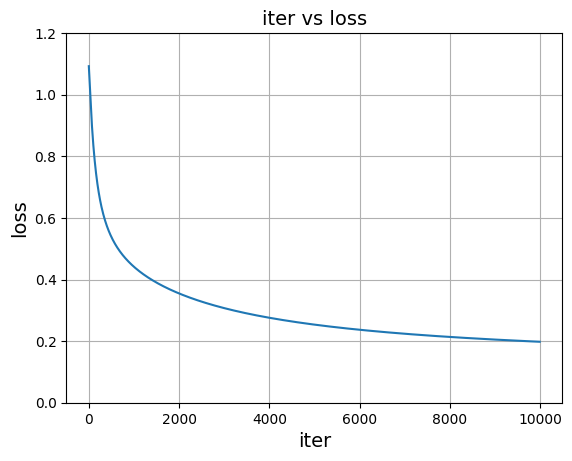

In [20]:
# 学習曲線の表示 (損失関数)
# Show learning curve (loss function)
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.ylim(0,1.2)
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

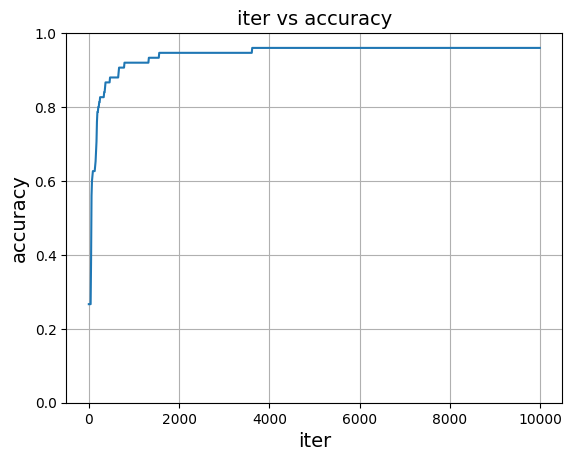

In [21]:
# 学習曲線の表示 (精度)
# Show learning curve (accuracy)
plt.plot(history[:,0], history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

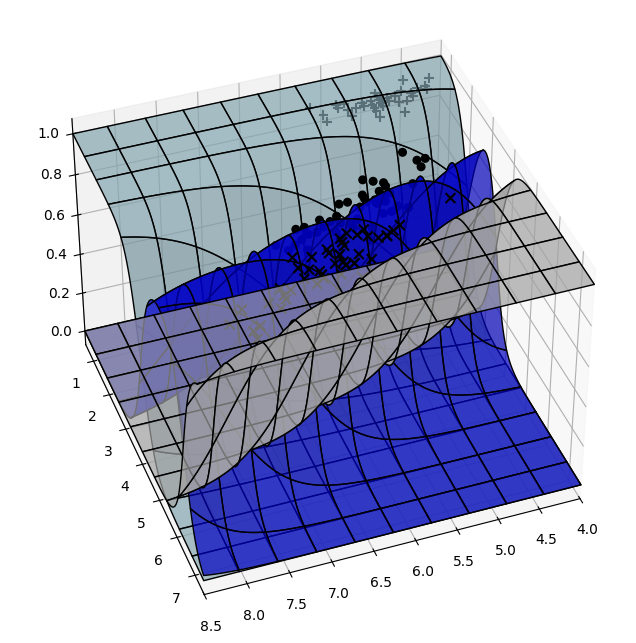

In [22]:
# 3次元表示
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 8.5, 100)
x2 = np.linspace(0.5, 7.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.array([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
pp = pred(xxx, W)
c0 = pp[:,0].reshape(xx1.shape)
c1 = pp[:,1].reshape(xx1.shape)
c2 = pp[:,2].reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c0, color='lightblue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c1, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c2, color='lightgrey', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.scatter(x_t0[:,0], x_t0[:,1], 1, s=50, alpha=1, marker='+', c='k')
ax.scatter(x_t1[:,0], x_t1[:,1], 1, s=30, alpha=1, marker='o', c='k')
ax.scatter(x_t2[:,0], x_t2[:,1], 1, s=50, alpha=1, marker='x', c='k')
ax.set_xlim(4,8.5)
ax.set_ylim(0.5,7.5)
ax.view_init(elev=40, azim=70)

In [23]:
# 評価
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# テストデータで予測値の計算
# Calculating prediction values by using test data
yp_test_one = pred(x_test, W)
yp_test = np.argmax(yp_test_one, axis=1)

#  精度の計算
# Calculating accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, yp_test)
print('accuracy: %f' % score)

# 混同行列の表示
# Show confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yp_test))
print(classification_report(y_test, yp_test))

accuracy: 0.960000
[[27  0  0]
 [ 0 20  0]
 [ 0  3 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      1.00      0.93        20
           2       1.00      0.89      0.94        28

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.96      0.96        75



# 入力変数を4次元に変更
# Change input variables to 4 dimension

In [24]:
# ダミー変数を追加
# Add dammy variables
x_all2 = np.insert(x_org, 0, 1.0, axis=1)

In [39]:
# 学習データ、検証データに分割
# split intto learning and test data
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train, y_test,\
y_train_one, y_test_one = train_test_split(
    x_all2, y_org, y_all_one, train_size=75, 
    test_size=75, random_state=123)

print(x_train2.shape, x_test2.shape, 
    y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape)

(75, 5) (75, 5) (75,) (75,) (75, 3) (75, 3)


In [26]:
print('入力データ(x)')
print(x_train2[:5,:])

入力データ(x)
[[1.  6.3 3.3 4.7 1.6]
 [1.  7.  3.2 4.7 1.4]
 [1.  5.  3.  1.6 0.2]
 [1.  6.4 2.8 5.6 2.1]
 [1.  6.3 2.5 5.  1.9]]


In [27]:
# 学習対象の選択
# Select target of learning
x, yt, x_test  = x_train2, y_train_one, x_test2

In [28]:
# 初期化処理
# Initializing process

# 標本数
# Number of samples
M  = x.shape[0]

# 入力次元数(ダミー変数を含む
# Number of dimensions of input data including dummu variables
D = x.shape[1]

# 分類先クラス数
# number of class
N = yt.shape[1]

# 繰り返し回数
# Number of repetition
iters = 10000

# 学習率
# Learning rate
alpha = 0.01

# 重み行列の初期設定(すべて1)
# Initial setting of weight matrix (all numbers are one)
W = np.ones((D, N)) 

# 評価結果記録用
# For recording evaluation results
history = np.zeros((0, 3))

Reference

Innner product of weight matrix and input data
```math
u^{(k)(m)} = W^{(k)} * x^{(m)}    \qquad    (9.7.1)
```

Calculate the predicted value vector using the softmax function from the inner product result
```math
yp^{(k)(m)} = h(u^{(k)(m)})    \qquad    (9.7.2)
```

Softmax function
```math
h_i = \frac{\exp(u_i)}{\sum_{j=0}^{N-1}\exp(u_j)}   \qquad    (9.7.3)
```

Error vector from prediction and true vector
```math
yd^{(k)(m)} = yp^{(k)(m)} - yt^{(m)}    \qquad    (9.7.4)
```

Change weight matrix value from error
```math
w_{ij}^{(k+1)} = w_{ij}^{(k)} - \frac{\alpha}{M}{\sum_{m=0}^{M-1}yd_i^{(k)(m)}*x_j^{(m)} }  \qquad    (9.7.5)
```

In [29]:
#  メイン処理(４次元版)
# Main process (4D ver.)
for k in range(iters):
    
    # 予測値の計算 (9.7.1)　(9.7.2)
    # Calculating prediction value
    yp = pred(x, W)
    
    # 誤差の計算 (9.7.4)
    # Calculating error
    yd = yp - yt

    # 重みの更新 (9.7.5)
    # Update weight
    W = W - alpha * (x.T @ yd) / M

    if (k % 10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history, np.array([k, loss, score])))
        print("epoch = %d loss = %f score = %f" % (k, loss, score))

epoch = 0 loss = 1.091583 score = 0.266667
epoch = 10 loss = 1.041711 score = 0.266667
epoch = 20 loss = 0.988501 score = 0.266667
epoch = 30 loss = 0.939962 score = 0.573333
epoch = 40 loss = 0.897037 score = 0.626667
epoch = 50 loss = 0.859177 score = 0.626667
epoch = 60 loss = 0.825724 score = 0.626667
epoch = 70 loss = 0.796070 score = 0.626667
epoch = 80 loss = 0.769683 score = 0.653333
epoch = 90 loss = 0.746103 score = 0.653333
epoch = 100 loss = 0.724936 score = 0.693333
epoch = 110 loss = 0.705850 score = 0.746667
epoch = 120 loss = 0.688561 score = 0.760000
epoch = 130 loss = 0.672832 score = 0.760000
epoch = 140 loss = 0.658461 score = 0.786667
epoch = 150 loss = 0.645275 score = 0.786667
epoch = 160 loss = 0.633131 score = 0.786667
epoch = 170 loss = 0.621903 score = 0.813333
epoch = 180 loss = 0.611485 score = 0.813333
epoch = 190 loss = 0.601788 score = 0.840000
epoch = 200 loss = 0.592731 score = 0.840000
epoch = 210 loss = 0.584248 score = 0.880000
epoch = 220 loss = 0.

In [30]:
print(history.shape)

(1000, 3)


In [31]:
# 損失関数値と精度の確認
# Check value of loss function and accuracy
print('初期状態: 損失関数:%f 精度:%f' 
    % (history[0,1], history[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
    % (history[-1,1], history[-1,2]))

初期状態: 損失関数:1.091583 精度:0.266667
最終状態: 損失関数:0.137235 精度:0.960000


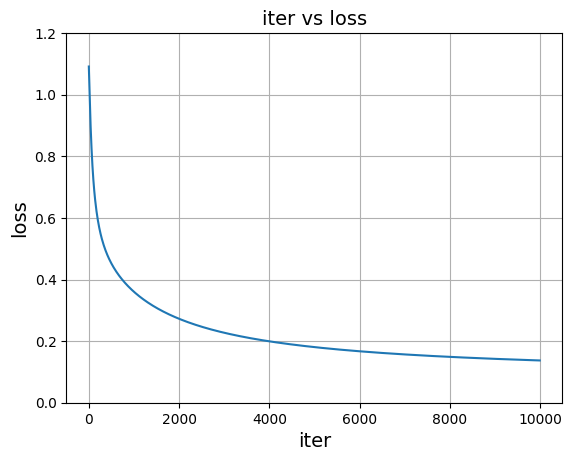

In [32]:
# 学習曲線の表示 (損失関数)
# Show lerning curve (loss function)
plt.plot(history[:,0], history[:,1])
plt.ylim(0,1.2)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

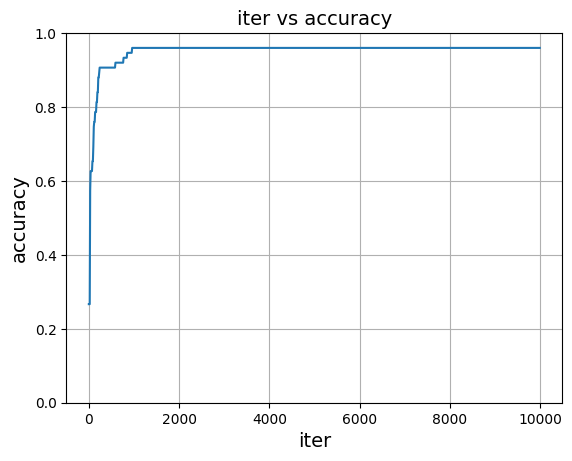

In [33]:
# 学習曲線の表示 (精度)
# Show lerning curve (accuracy)
plt.plot(history[:,0], history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

## Reference: about axis

In [34]:
import numpy as np

In [35]:
x = np.array([[1,2,3],[4,5,6]])
print(x)

[[1 2 3]
 [4 5 6]]


In [36]:
y = x.sum(axis=0)
print(y)

[5 7 9]


In [37]:
z = x.sum(axis=1)
print(z)

[ 6 15]


In [38]:
w = x.sum()
print(w)

21
